# A/B testing with ML

Here I will try out different version of our dataset with the following three models.

1. Logistic Regression
2. Decission Tree
3. XGBoost

In [1]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import cross_val_score

import sys
sys.path.append("../")

from Scripts.modeling_pipeline import (
    run_train_pipeline, 
    get_pipeline,
    dvc_get_data)

import os
import mlflow

Get the data using DVC

## Cleaned dataframe

In [2]:
df = dvc_get_data(path='Data/cleaned_data.csv', 
                version='v1')
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   experiment    1243 non-null   object
 1   date          1243 non-null   object
 2   hour          1243 non-null   int64 
 3   device_make   1243 non-null   object
 4   platform_os   1243 non-null   int64 
 5   browser       1243 non-null   object
 6   response      1243 non-null   int64 
 7   date_of_week  1243 non-null   object
dtypes: int64(3), object(5)
memory usage: 77.8+ KB


In [3]:
x = df.drop(columns=['response'])
y = df['response'].values


In [ ]:
model = LogisticRegression()
run_train_pipeline(model, x, y, 
                experiment_name='full cleaned dataset',
                run_name='vanila logistic regression')

mlflow.end_run()

{'accuracy': 0.57, 'precision': 0.49, 'recall': 0.47, 'entropy': 0.85, 'true_pos': 136, 'true_neg': 75, 'false_pos': 78, 'false_neg': 84}
{'experiment': 0.05060118167173361, 'date': 0.07319113817880124, 'hour': 0.43918257416450046, 'device_make': 0.27735520331861346, 'platform_os': 0.004113782550483748, 'browser': 0.08832127439856895, 'date_of_week': 0.06723484571729868}


Successfully registered model 'full cleaned dataset_vanila random forest_Sat-May-21-23:34:33-2022'.
2022/05/21 23:34:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: full cleaned dataset_vanila random forest_Sat-May-21-23:34:33-2022, version 1
Created version '1' of model 'full cleaned dataset_vanila random forest_Sat-May-21-23:34:33-2022'.


Run - vanila random forest is logged to Experiment - full cleaned dataset


{'accuracy': 0.57,
 'precision': 0.49,
 'recall': 0.47,
 'entropy': 0.85,
 'true_pos': 136,
 'true_neg': 75,
 'false_pos': 78,
 'false_neg': 84}

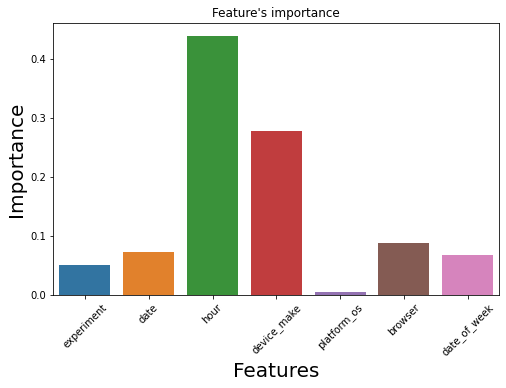

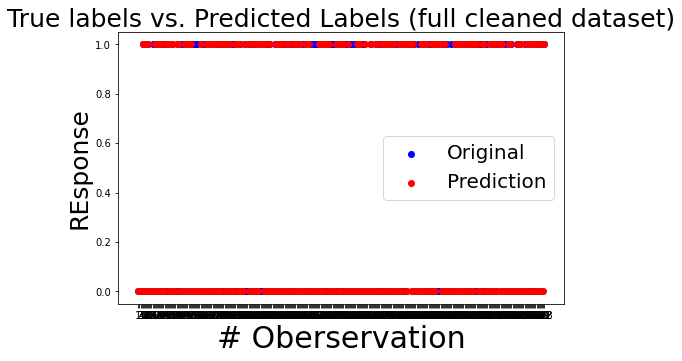

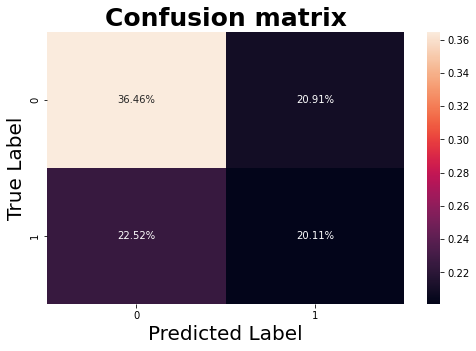

In [6]:
model = RandomForestClassifier()
run_train_pipeline(model, x, y, 
                experiment_name='full cleaned dataset',
                run_name='vanila random forest')
mlflow.end_run()

In [7]:

mlflow.end_run()

{'accuracy': 0.54, 'precision': 0.46, 'recall': 0.45, 'entropy': 0.84, 'true_pos': 129, 'true_neg': 72, 'false_pos': 85, 'false_neg': 87}
{'experiment': 0.0481753134545367, 'date': 0.07453556965792715, 'hour': 0.44818567940710546, 'device_make': 0.27176598496782506, 'platform_os': 0.003861420436594988, 'browser': 0.0800580709880761, 'date_of_week': 0.07341796108793462}


Successfully registered model 'full cleaned dataset_depth 20 random forest_Sat-May-21-23:35:10-2022'.
2022/05/21 23:35:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: full cleaned dataset_depth 20 random forest_Sat-May-21-23:35:10-2022, version 1
Created version '1' of model 'full cleaned dataset_depth 20 random forest_Sat-May-21-23:35:10-2022'.


Run - depth 20 random forest is logged to Experiment - full cleaned dataset


{'accuracy': 0.54,
 'precision': 0.46,
 'recall': 0.45,
 'entropy': 0.84,
 'true_pos': 129,
 'true_neg': 72,
 'false_pos': 85,
 'false_neg': 87}

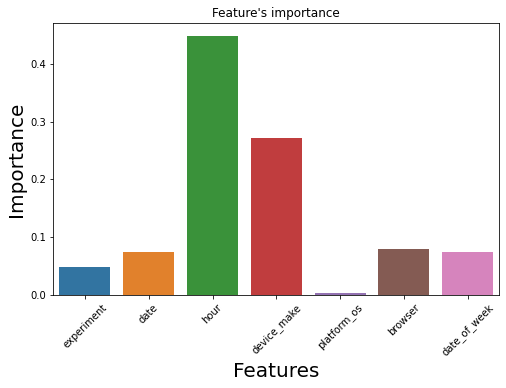

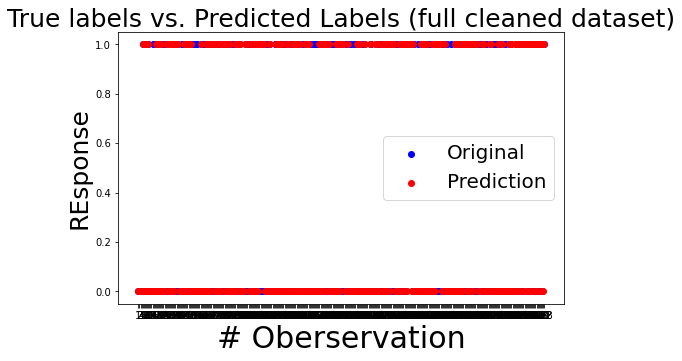

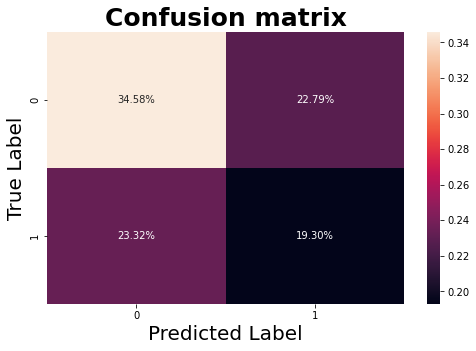

In [8]:
model = RandomForestClassifier(max_depth=20)
run_train_pipeline(model, x, y, 
                experiment_name='full cleaned dataset',
                run_name='depth 20 random forest')
mlflow.end_run()

So far all the models I have tried haven't even reached 60% accuracy. 
The feature importance plot tells me that the experiment group is not contributing much to
the decision. 

Next, I will try the same thing on a variation of the dataset

## browser_chrome_mobile dataset

In [10]:
df = dvc_get_data(path='Data/browser_chrome_mobile.csv', 
                version='v2')
# df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   experiment    695 non-null    object
 1   date          695 non-null    object
 2   hour          695 non-null    int64 
 3   device_make   695 non-null    object
 4   platform_os   695 non-null    int64 
 5   response      695 non-null    int64 
 6   date_of_week  695 non-null    object
dtypes: int64(3), object(4)
memory usage: 38.1+ KB


In [13]:
x = df.drop(columns=['response'])
y = df['response'].values



{'accuracy': 0.52, 'precision': 0.4, 'recall': 0.2, 'entropy': 0.7, 'true_pos': 90, 'true_neg': 18, 'false_pos': 27, 'false_neg': 74}
{'experiment': -0.10853223640284124, 'date': -0.029032862742486423, 'hour': 0.08076220031697501, 'device_make': 0.19223528138924983, 'platform_os': 0.0, 'date_of_week': 0.14769502228698733}


Successfully registered model 'browser_chrome_mobile dataset_vanila logistic regression_Sat-May-21-23:40:51-2022'.
2022/05/21 23:41:00 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: browser_chrome_mobile dataset_vanila logistic regression_Sat-May-21-23:40:51-2022, version 1
Created version '1' of model 'browser_chrome_mobile dataset_vanila logistic regression_Sat-May-21-23:40:51-2022'.


Run - vanila logistic regression is logged to Experiment - browser_chrome_mobile dataset


{'accuracy': 0.52,
 'precision': 0.4,
 'recall': 0.2,
 'entropy': 0.7,
 'true_pos': 90,
 'true_neg': 18,
 'false_pos': 27,
 'false_neg': 74}

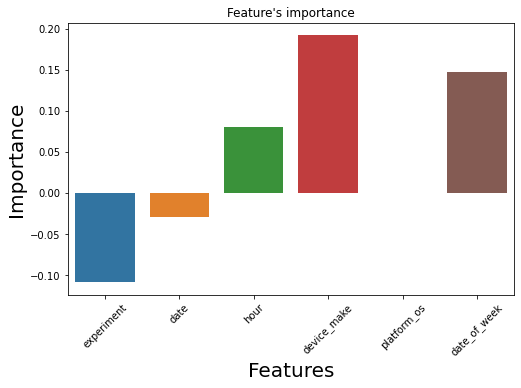

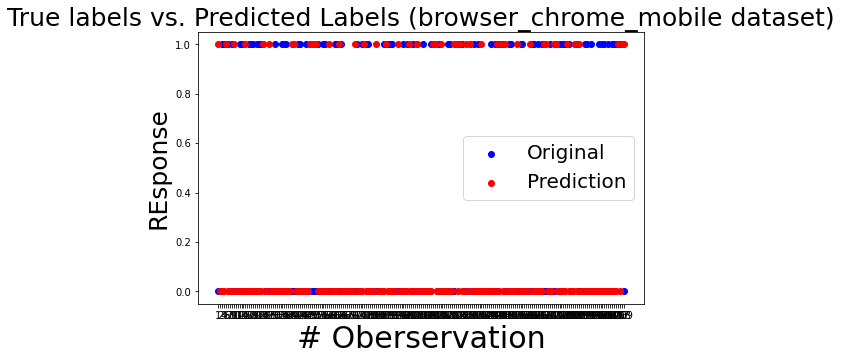

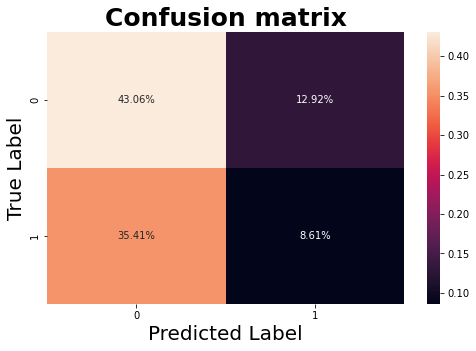

In [14]:
mlflow.end_run()
model = LogisticRegression()
run_train_pipeline(model, x, y, 
                experiment_name='browser_chrome_mobile dataset',
                run_name='vanila logistic regression')



{'accuracy': 0.53, 'precision': 0.46, 'recall': 0.35, 'entropy': 0.93, 'true_pos': 79, 'true_neg': 32, 'false_pos': 38, 'false_neg': 60}
{'experiment': 0.043422992565174214, 'date': 0.08108300938193702, 'hour': 0.7402913884354738, 'device_make': 0.054002363660946726, 'platform_os': 0.0, 'date_of_week': 0.08120024595646835}


Successfully registered model 'browser_chrome_mobile dataset_vanilla random forest_Sat-May-21-23:42:32-2022'.
2022/05/21 23:42:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: browser_chrome_mobile dataset_vanilla random forest_Sat-May-21-23:42:32-2022, version 1
Created version '1' of model 'browser_chrome_mobile dataset_vanilla random forest_Sat-May-21-23:42:32-2022'.


Run - vanilla random forest is logged to Experiment - browser_chrome_mobile dataset


{'accuracy': 0.53,
 'precision': 0.46,
 'recall': 0.35,
 'entropy': 0.93,
 'true_pos': 79,
 'true_neg': 32,
 'false_pos': 38,
 'false_neg': 60}

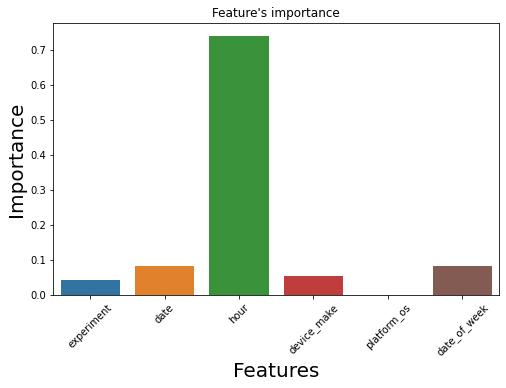

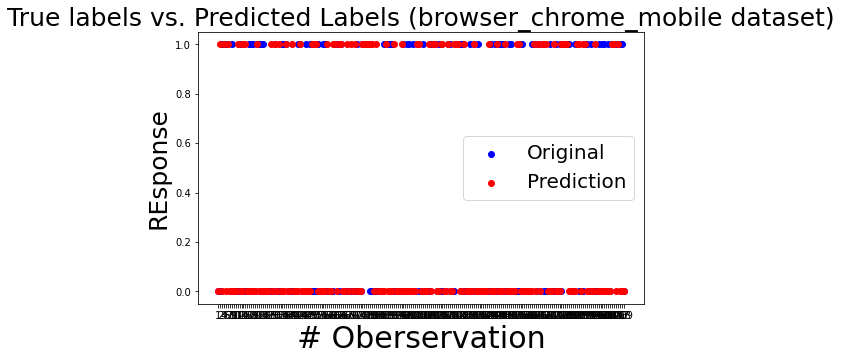

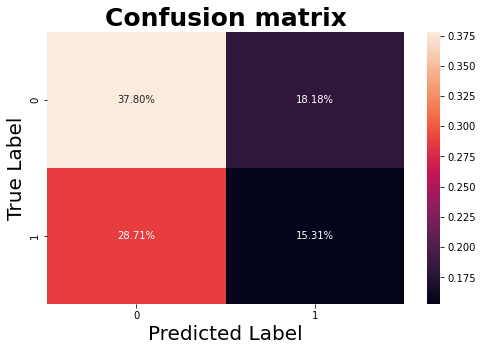

In [15]:
mlflow.end_run()
model = RandomForestClassifier()
run_train_pipeline(model, x, y, 
                experiment_name='browser_chrome_mobile dataset',
                run_name='vanilla random forest')


## XGBoost

In [2]:
df = dvc_get_data(path='Data/cleaned_data.csv', 
                version='v1')
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   experiment    1243 non-null   object
 1   date          1243 non-null   object
 2   hour          1243 non-null   int64 
 3   device_make   1243 non-null   object
 4   platform_os   1243 non-null   int64 
 5   browser       1243 non-null   object
 6   response      1243 non-null   int64 
 7   date_of_week  1243 non-null   object
dtypes: int64(3), object(5)
memory usage: 77.8+ KB


In [3]:
x = df.drop(columns=['response'])
y = df['response'].values


{'accuracy': 0.55, 'precision': 0.47, 'recall': 0.43, 'entropy': 0.82, 'true_pos': 137, 'true_neg': 68, 'false_pos': 77, 'false_neg': 91}
{'experiment': 0.17, 'date': 0.18, 'hour': 0.17, 'device_make': 0.15, 'platform_os': 0.0, 'browser': 0.15, 'date_of_week': 0.18}


Successfully registered model 'cleaned dataset_vanilla XGBoost Classifier_Sun-May-22-07:31:52-2022'.
2022/05/22 07:32:05 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: cleaned dataset_vanilla XGBoost Classifier_Sun-May-22-07:31:52-2022, version 1
Created version '1' of model 'cleaned dataset_vanilla XGBoost Classifier_Sun-May-22-07:31:52-2022'.


Run - vanilla XGBoost Classifier is logged to Experiment - cleaned dataset


{'accuracy': 0.55,
 'precision': 0.47,
 'recall': 0.43,
 'entropy': 0.82,
 'true_pos': 137,
 'true_neg': 68,
 'false_pos': 77,
 'false_neg': 91}

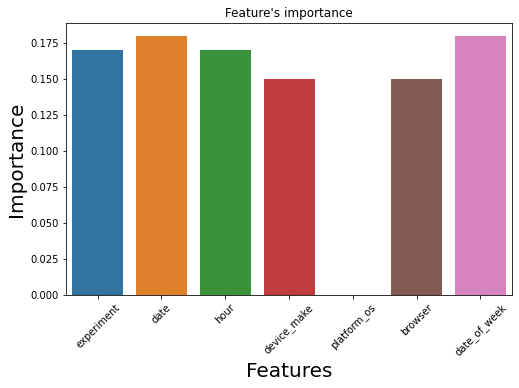

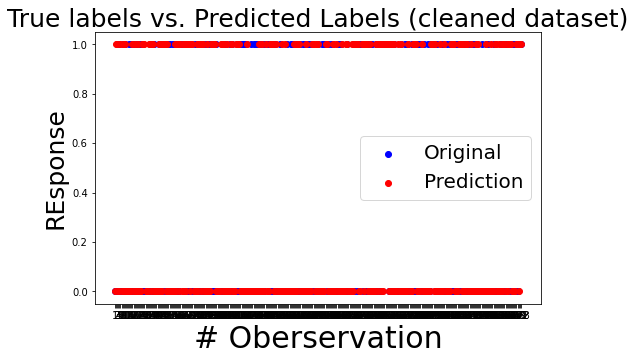

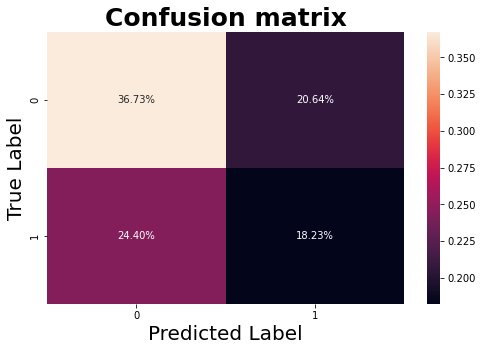

In [4]:
mlflow.end_run()
model = XGBClassifier()
run_train_pipeline(model, x, y, 
                experiment_name='cleaned dataset',
                run_name='vanilla XGBoost Classifier')


{'accuracy': 0.59, 'precision': 0.55, 'recall': 0.26, 'entropy': 0.68, 'true_pos': 179, 'true_neg': 42, 'false_pos': 35, 'false_neg': 117}
{'experiment': 0.13, 'date': 0.12, 'hour': 0.16, 'device_make': 0.18, 'platform_os': 0.11, 'browser': 0.15, 'date_of_week': 0.16}


Successfully registered model 'cleaned dataset_vanilla XGBoost random forest Classifier_Sun-May-22-07:32:30-2022'.
2022/05/22 07:32:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: cleaned dataset_vanilla XGBoost random forest Classifier_Sun-May-22-07:32:30-2022, version 1
Created version '1' of model 'cleaned dataset_vanilla XGBoost random forest Classifier_Sun-May-22-07:32:30-2022'.


Run - vanilla XGBoost random forest Classifier is logged to Experiment - cleaned dataset


{'accuracy': 0.59,
 'precision': 0.55,
 'recall': 0.26,
 'entropy': 0.68,
 'true_pos': 179,
 'true_neg': 42,
 'false_pos': 35,
 'false_neg': 117}

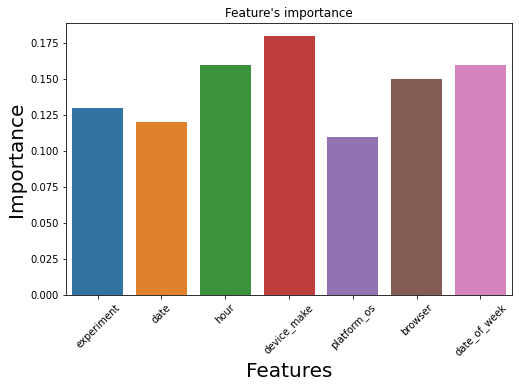

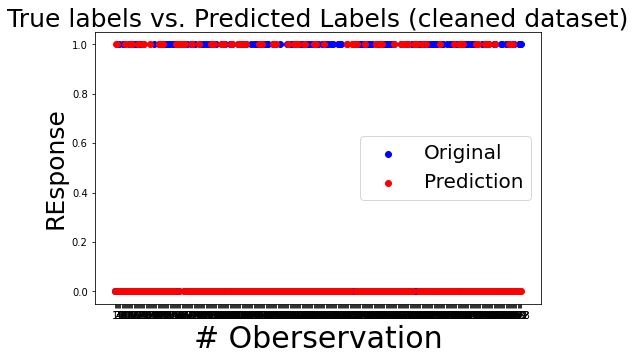

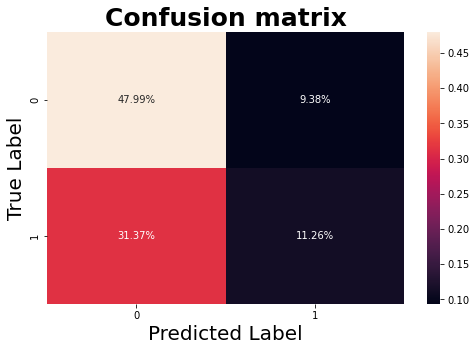

In [5]:
mlflow.end_run()
model = XGBRFClassifier()
run_train_pipeline(model, x, y, 
                experiment_name='cleaned dataset',
                run_name='vanilla XGBoost random forest Classifier')